In [1]:
import pandas as pd

#### Кол-во вакцинированных

In [2]:
vaccinated = pd.read_csv(r'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/vaccine_data_global.csv', sep=',')

In [3]:
vaccinated.tail()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
561,NaN,Venezuela,2021-10-27,16127242,9.926613e+06,6.190629e+06,2021-10-27,862.0
562,NaN,Vietnam,2021-10-27,74950393,5.312589e+07,2.182451e+07,2021-10-27,704.0
563,NaN,World,2021-10-27,6880765899,3.774878e+09,2.913475e+09,2021-10-27,NaN
564,NaN,Zambia,2021-10-27,871881,3.110490e+05,5.110040e+05,2021-10-27,894.0
565,NaN,Zimbabwe,2021-10-27,5866629,3.294687e+06,2.571942e+06,2021-10-27,716.0


In [4]:
vaccinated = vaccinated[['Country_Region', 'Doses_admin',
       'People_partially_vaccinated', 'People_fully_vaccinated']].fillna(0).groupby('Country_Region').max()

In [5]:
vaccinated.head()

,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
Country_Region,,,
Afghanistan,2925490,828601.0,430744.0
Albania,1873903,998130.0,875773.0
Algeria,11080739,6328806.0,4751933.0
Andorra,102692,54312.0,47720.0
Angola,5940208,4511991.0,1604661.0


#### Кол-во заражений, смертей

In [8]:
case = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-25-2021.csv', sep=',')

In [9]:
case = case[['Country_Region', 'Confirmed', 'Deaths']].groupby(['Country_Region']).sum()

In [11]:
case.head()

,Confirmed,Deaths
Country_Region,,
Afghanistan,156040,7260
Albania,181960,2880
Algeria,205903,5894
Andorra,15425,130
Angola,63930,1701


#### Макро данные World Bank Data

In [12]:
# !pip install world_bank_data
import world_bank_data as wb
# wb.get_topics()
# wb.search_indicators('gdp per capita')

In [120]:
wb.get_series('SP.POP.TOTL', id_or_value='id')

Country                      Series             Year
Africa Eastern and Southern  Population, total  1960    130836765.0
                                                1961    134159786.0
                                                1962    137614644.0
                                                1963    141202036.0
                                                1964    144920186.0
                                                           ...     
Zimbabwe                     Population, total  2016     14030338.0
                                                2017     14236599.0
                                                2018     14438812.0
                                                2019     14645473.0
                                                2020     14862927.0
Name: SP.POP.TOTL, Length: 16226, dtype: float64

In [30]:
def actualize(df):
    df.reset_index(inplace=True)
    title = df['Series'].iloc[0]
    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Series','Year', 'Actual_year'], axis=1, inplace=True)
    df.columns = ['Country', title]
    return df

In [128]:
def actualize_2(df):
    df.reset_index(inplace=True)

    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Year', 'Actual_year'], axis=1, inplace=True)
    return df

#### GDP per capita по паритету

In [145]:
df = actualize(pd.DataFrame(wb.get_series('NY.GDP.PCAP.PP.KD')))
df2 = actualize_2(pd.DataFrame(wb.get_series('NY.GDP.PCAP.PP.KD', id_or_value='id')))

gdp_per_capita_pp = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})

gdp_per_capita_pp.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,"GDP per capita, PPP (constant 2017 international $)",ISO
60,Africa Eastern and Southern,3387.594670,AFE
121,Africa Western and Central,4003.158913,AFW
182,Arab World,13753.707307,ARB
243,Caribbean small states,14844.461307,CSS
304,Central Europe and the Baltics,31329.499526,CEB


#### GDP per capita

In [146]:
df = actualize(pd.DataFrame(wb.get_series('NY.GDP.PCAP.KD')))
df2 = actualize_2(pd.DataFrame(wb.get_series('NY.GDP.PCAP.KD', id_or_value='id')))

gdp_per_capita = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})

gdp_per_capita.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,GDP per capita (constant 2010 US$),ISO
60,Africa Eastern and Southern,1502.096220,AFE
121,Africa Western and Central,1726.022645,AFW
182,Arab World,6043.964402,ARB
243,Caribbean small states,8501.593941,CSS
304,Central Europe and the Baltics,16333.722488,CEB


####  education expenditure (% of GNI)

In [147]:
df = actualize(pd.DataFrame(wb.get_series('NY.ADJ.AEDU.GN.ZS')))
df2 = actualize_2(pd.DataFrame(wb.get_series('NY.ADJ.AEDU.GN.ZS', id_or_value='id')))

education_percent_gni = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


education_percent_gni.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,Adjusted savings: education expenditure (% of GNI),ISO
59,Africa Eastern and Southern,4.624610,AFE
120,Africa Western and Central,1.928661,AFW
181,Arab World,5.103971,ARB
242,Caribbean small states,3.806306,CSS
303,Central Europe and the Baltics,3.973777,CEB


#### Population

In [148]:
df = actualize(pd.DataFrame(wb.get_series('SP.POP.TOTL')))
df2 = actualize_2(pd.DataFrame(wb.get_series('SP.POP.TOTL', id_or_value='id')))

population = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


population.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,"Population, total",ISO
60,Africa Eastern and Southern,677243299.0,AFE
121,Africa Western and Central,458803476.0,AFW
182,Arab World,436080728.0,ARB
243,Caribbean small states,7442291.0,CSS
304,Central Europe and the Baltics,102246330.0,CEB


#### GDP

In [149]:
df = actualize(pd.DataFrame(wb.get_series('NY.GDP.MKTP.KD')))
df2 = actualize_2(pd.DataFrame(wb.get_series('NY.GDP.MKTP.KD', id_or_value='id')))

gdp = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


gdp.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,GDP (constant 2010 US$),ISO
60,Africa Eastern and Southern,1.017285e+12,AFE
121,Africa Western and Central,7.919052e+11,AFW
182,Arab World,2.635656e+12,ARB
243,Caribbean small states,6.327134e+10,CSS
304,Central Europe and the Baltics,1.670063e+12,CEB


#### GDP по паритету

In [150]:
df = actualize(pd.DataFrame(wb.get_series('NY.GDP.MKTP.PP.CD')))
df2 = actualize_2(pd.DataFrame(wb.get_series('NY.GDP.MKTP.PP.CD', id_or_value='id')))

gdp_pp = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


gdp_pp.tail()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,"GDP, PPP (current international $)",ISO
15920,Vietnam,8.420424e+11,VNM
16042,West Bank and Gaza,2.733198e+10,PSE
16096,"Yemen, Rep.",9.275561e+10,YEM
16164,Zambia,6.341747e+10,ZMB
16225,Zimbabwe,4.303435e+10,ZWE


#### Central government debt

In [151]:
df = actualize(pd.DataFrame(wb.get_series('GC.DOD.TOTL.GD.ZS')))
df2 = actualize_2(pd.DataFrame(wb.get_series('GC.DOD.TOTL.GD.ZS', id_or_value='id')))

debt = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})

debt.tail()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,"Central government debt, total (% of GDP)",ISO
15550,United Kingdom,115.016454,GBR
15611,United States,98.816982,USA
15672,Uruguay,46.656630,URY
15777,Vanuatu,27.303212,VUT
16159,Zambia,49.407327,ZMB


#### Military expenditure

In [152]:
df = actualize(pd.DataFrame(wb.get_series('MS.MIL.XPND.GD.ZS')))
df2 = actualize_2(pd.DataFrame(wb.get_series('MS.MIL.XPND.GD.ZS', id_or_value='id')))

military = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})

military.tail()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,Military expenditure (% of GDP),ISO
15856,"Venezuela, RB",2.233332,VEN
15918,Vietnam,2.284570,VNM
16097,"Yemen, Rep.",3.966891,YEM
16164,Zambia,1.154225,ZMB
16224,Zimbabwe,0.698601,ZWE


#### Human Capital Index 

In [153]:
df = actualize(pd.DataFrame(wb.get_series('HD.HCI.OVRL')))
df2 = actualize_2(pd.DataFrame(wb.get_series('HD.HCI.OVRL', id_or_value='id')))

human_capital = df.merge(df2[['Country']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})

human_capital.tail()

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,Human Capital Index (HCI) (scale 0-1),ISO
2331,Vietnam,0.689965,VNM
2353,West Bank and Gaza,0.579997,PSE
2364,"Yemen, Rep.",0.372784,YEM
2375,Zambia,0.396928,ZMB
2386,Zimbabwe,0.466893,ZWE


#### Индекс коррупции

In [59]:
import requests, zipfile, io
r = requests.get('https://images.transparencycdn.org/images/CPI_FULL_DATA_2021-01-27-162209.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [60]:
corruption = pd.read_excel('CPI2020_GlobalTablesTS_210125.xlsx')
corruption.columns = corruption.iloc[1,].values
corruption = corruption.iloc[2:,]
corruption.head()

,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
2,Denmark,DNK,WE/EU,88,1,1.775809,8,85.08767,90.91233,NaN,...,90,NaN,83,94,NaN,98,78,NaN,79,86
3,New Zealand,NZL,AP,88,1,1.479342,8,85.57388,90.42612,NaN,...,90,NaN,83,92,NaN,93,77,NaN,89,82
4,Finland,FIN,WE/EU,85,3,1.748594,8,82.13231,87.86769,NaN,...,72,NaN,83,91,NaN,93,77,NaN,93,86
5,Singapore,SGP,AP,85,3,1.203239,9,83.02669,86.97331,NaN,...,90,NaN,83,91,90,85,77,NaN,89,85
6,Sweden,SWE,WE/EU,85,3,1.303953,8,82.86152,87.13848,NaN,...,90,NaN,83,84,NaN,93,77,NaN,77,87


In [69]:
corruption = corruption[['Country', 'ISO3', 'CPI score 2020']]
corruption.head()

,Country,ISO3,CPI score 2020
2,Denmark,DNK,88
3,New Zealand,NZL,88
4,Finland,FIN,85
5,Singapore,SGP,85
6,Sweden,SWE,85


#### WORLD PRESS FREEDOM INDEX
https://rsf.org/en/ranking_table

In [70]:
press_freedom = pd.read_csv('index_2021_pour_import_-_index_2020_-_pour_import_1_1_-_index_2020_-_pour_import_1_1.csv')

In [73]:
press_freedom = press_freedom[['EN_country', 'ISO', 'Score 2020']]
press_freedom.head()

,EN_country,ISO,Score 2020
0,Afghanistan,AFG,"40,19"
1,Angola,AGO,"34,06"
2,Albania,ALB,"30,59"
3,Andorra,AND,"23,32"
4,United Arab Emirates,ARE,"43,13"


## Joins

In [78]:
vaccinated_case = vaccinated.dropna().merge(case, how='outer', left_index=True, right_index=True)
vaccinated_case.head()

,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths
Country_Region,,,,,
Afghanistan,2925490.0,828601.0,430744.0,156040.0,7260.0
Albania,1873903.0,998130.0,875773.0,181960.0,2880.0
Algeria,11080739.0,6328806.0,4751933.0,205903.0,5894.0
Andorra,102692.0,54312.0,47720.0,15425.0,130.0
Angola,5940208.0,4511991.0,1604661.0,63930.0,1701.0


In [185]:
vaccinated_case.reset_index(inplace=True)

In [84]:
vaccinated_case.isna().sum()

Doses_admin                    32
People_partially_vaccinated    32
People_fully_vaccinated        32
Confirmed                       2
Deaths                          2
dtype: int64

In [193]:
vaccinated_case.dropna(subset=['People_fully_vaccinated'], inplace=True)
vaccinated_case.isna().sum()

Country_Region                 0
Doses_admin                    0
People_partially_vaccinated    0
People_fully_vaccinated        0
Confirmed                      2
Deaths                         2
dtype: int64

In [155]:
world_bank_data = gdp_per_capita_pp. \
merge(gdp_per_capita, how='outer', on=['Country', 'ISO']). \
merge(education_percent_gni, how='outer', on=['Country', 'ISO']). \
merge(population, how='outer', on=['Country', 'ISO']). \
merge(gdp, how='outer', on=['Country', 'ISO']). \
merge(gdp_pp, how='outer', on=['Country', 'ISO']). \
merge(debt, how='outer', on=['Country', 'ISO']). \
merge(military, how='outer', on=['Country', 'ISO']). \
merge(human_capital, how='outer', on=['Country', 'ISO'])
world_bank_data.head()

,Country,"GDP per capita, PPP (constant 2017 international $)",ISO,GDP per capita (constant 2010 US$),Adjusted savings: education expenditure (% of GNI),"Population, total",GDP (constant 2010 US$),"GDP, PPP (current international $)","Central government debt, total (% of GDP)",Military expenditure (% of GDP),Human Capital Index (HCI) (scale 0-1)
0,Africa Eastern and Southern,3387.594670,AFE,1502.096220,4.624610,677243299.0,1.017285e+12,2.403001e+12,NaN,1.157932,NaN
1,Africa Western and Central,4003.158913,AFW,1726.022645,1.928661,458803476.0,7.919052e+11,1.937524e+12,NaN,1.004353,NaN
2,Arab World,13753.707307,ARB,6043.964402,5.103971,436080728.0,2.635656e+12,6.334964e+12,NaN,5.472655,NaN
3,Caribbean small states,14844.461307,CSS,8501.593941,3.806306,7442291.0,6.327134e+10,1.165436e+11,49.894355,0.983420,NaN
4,Central Europe and the Baltics,31329.499526,CEB,16333.722488,3.973777,102246330.0,1.670063e+12,3.446914e+12,NaN,1.957002,NaN


In [164]:
corruption.rename(columns={'ISO3':'ISO', 'Country':'Country_corrupted'}, inplace=True)

In [165]:
corruption_press = press_freedom.merge(corruption, how='outer', left_on='ISO', right_on='ISO')
corruption_press.head()

,EN_country,ISO,Score 2020,Country_corrupted,CPI score 2020
0,Afghanistan,AFG,"40,19",Afghanistan,19
1,Angola,AGO,"34,06",Angola,27
2,Albania,ALB,"30,59",Albania,36
3,Andorra,AND,"23,32",NaN,NaN
4,United Arab Emirates,ARE,"43,13",United Arab Emirates,71


In [494]:
join = world_bank_data.merge(corruption_press, how='outer', on='ISO')

In [495]:
join.dropna(subset=['Country'], inplace=True)

In [496]:
join.Country[join.Country.str.contains('Iran', case=False)] ='Iran'
join.Country[join.Country.str.contains('Korea, Rep.', case=False)] = 'Korea, South'
join.Country[join.Country.str.contains('Kyrgyz', case=False)] = 'Kyrgyzstan'
join.Country[join.Country.str.contains('Lao', case=False)] = 'Laos'
join.Country[join.Country.str.contains('Czech', case=False)] = 'Czechia'
join.Country[join.Country.str.contains('Micronesia', case=False)] = 'Micronesia'
join.Country[join.Country.str.contains('Russia', case=False)] = 'Russia'
join.Country[join.Country.str.contains('Kitts', case=False)] = 'Saint Kitts and Nevis'
join.Country[join.Country.str.contains('Myanmar', case=False)] = 'Burma'
join.Country[join.Country.str.contains('Vincent', case=False)] = 'Saint Vincent and the Grenadines'
join.Country[join.Country.str.contains('Slovak', case=False)] = 'Slovakia'
join.Country[join.Country.str.contains('Syr', case=False)] = 'Syria'
join.Country[join.Country.str.contains('United States', case=False)] = 'US (Aggregate)'
join.Country[join.Country.str.contains('Venezuela', case=False)] = 'Venezuela'
join.Country[join.Country.str.contains('Bahamas', case=False)] = 'Bahamas'
join.Country[join.Country.str.contains('Brunei', case=False)] = 'Brunei'
join.Country[join.Country.str.contains('Egypt', case=False)] = 'Egypt'
join.Country[join.Country.str.contains('Gambia', case=False)] = 'Gambia'
join.Country[join.Country.str.contains('Lucia', case=False)] = 'Saint Lucia'

C:\Users\4880~1\AppData\Local\Temp/ipykernel_15872/4209984999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join.Country[join.Country.str.contains('Iran', case=False)] ='Iran'
C:\Users\4880~1\AppData\Local\Temp/ipykernel_15872/4209984999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join.Country[join.Country.str.contains('Korea, Rep.', case=False)] = 'Korea, South'
C:\Users\4880~1\AppData\Local\Temp/ipykernel_15872/4209984999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [497]:
sorted(set(vaccinated_case.Country_Region) - set(join.Country))

['Taiwan*', 'US']

In [522]:
df = join.merge(vaccinated_case, left_on='Country', right_on='Country_Region', how='inner')
df.shape

(163, 21)

In [523]:
df.drop(columns=['EN_country', 'ISO', 'Country_corrupted', 'Country_Region', 'Central government debt, total (% of GDP)'], inplace=True)

In [524]:
df.isna().sum()

Country                                                 0
GDP per capita, PPP (constant 2017 international $)     6
GDP per capita (constant 2010 US$)                      1
Adjusted savings: education expenditure (% of GNI)      5
Population, total                                       0
GDP (constant 2010 US$)                                 1
GDP, PPP (current international $)                      4
Military expenditure (% of GDP)                        21
Human Capital Index (HCI) (scale 0-1)                  15
Score 2020                                             17
CPI score 2020                                         13
Doses_admin                                             0
People_partially_vaccinated                             0
People_fully_vaccinated                                 0
Confirmed                                               2
Deaths                                                  2
dtype: int64

In [526]:
df['Score 2020'] = df['Score 2020'].str.replace(',', '.').astype(float)
df['CPI score 2020'] = df['CPI score 2020'].astype(float)

In [527]:
df.dropna(inplace=True)

# for i in df:
#     if i != 'Country':
#         df[i] = df[i].fillna(df[i].mean())

In [528]:
df.isna().sum()

Country                                                0
GDP per capita, PPP (constant 2017 international $)    0
GDP per capita (constant 2010 US$)                     0
Adjusted savings: education expenditure (% of GNI)     0
Population, total                                      0
GDP (constant 2010 US$)                                0
GDP, PPP (current international $)                     0
Military expenditure (% of GDP)                        0
Human Capital Index (HCI) (scale 0-1)                  0
Score 2020                                             0
CPI score 2020                                         0
Doses_admin                                            0
People_partially_vaccinated                            0
People_fully_vaccinated                                0
Confirmed                                              0
Deaths                                                 0
dtype: int64

In [529]:
df.head()

,Country,"GDP per capita, PPP (constant 2017 international $)",GDP per capita (constant 2010 US$),Adjusted savings: education expenditure (% of GNI),"Population, total",GDP (constant 2010 US$),"GDP, PPP (current international $)",Military expenditure (% of GDP),Human Capital Index (HCI) (scale 0-1),Score 2020,CPI score 2020,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths
1,Afghanistan,1978.961579,549.391787,2.593520,38928341.0,2.138691e+10,8.126822e+10,1.369684,0.400284,40.19,19.0,2925490.0,828601.0,430744.0,156040.0,7260.0
2,Albania,13295.410885,5064.061916,3.303330,2837743.0,1.437051e+10,3.921125e+10,1.535465,0.634251,30.59,36.0,1873903.0,998130.0,875773.0,181960.0,2880.0
3,Algeria,10681.679297,4362.739536,4.467196,43851043.0,1.913107e+11,4.941251e+11,6.659994,0.534556,47.26,36.0,11080739.0,6328806.0,4751933.0,205903.0,5894.0
4,Angola,6198.083841,2890.892897,3.570000,32866268.0,9.501286e+10,2.148945e+11,1.615852,0.362405,34.06,27.0,5940208.0,4511991.0,1604661.0,63930.0,1701.0
6,Argentina,19686.523659,8692.708046,4.993598,45376763.0,3.944470e+11,9.423669e+11,0.761487,0.602145,28.99,42.0,58995396.0,33204854.0,25449297.0,5281585.0,115851.0


In [531]:
df['death_share'] = df.Deaths / df['Population, total']
df['confirmed_share'] = df.Confirmed / df['Population, total']
df['target_num'] = df.People_partially_vaccinated / df['Population, total']

df['target_cat'] = 0
df['target_cat'][(df.target_num>=df.target_num.quantile(0.33)) & (df.target_num<=df.target_num.quantile(0.66))] = 1
df['target_cat'][(df.target_num>df.target_num.quantile(0.66))] = 2

# df['target_cat'] = 0
# df['target_cat'][(df.target_num>=0.33) & (df.target_num<=0.66)] = 1
# df['target_cat'][(df.target_num>0.66)] = 2


C:\Users\4880~1\AppData\Local\Temp/ipykernel_15872/3038886440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_cat'][(df.target_num>=df.target_num.quantile(0.33)) & (df.target_num<=df.target_num.quantile(0.66))] = 1
C:\Users\4880~1\AppData\Local\Temp/ipykernel_15872/3038886440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_cat'][(df.target_num>df.target_num.quantile(0.66))] = 2


#### Модель

In [532]:
df.head()

,Country,"GDP per capita, PPP (constant 2017 international $)",GDP per capita (constant 2010 US$),Adjusted savings: education expenditure (% of GNI),"Population, total",GDP (constant 2010 US$),"GDP, PPP (current international $)",Military expenditure (% of GDP),Human Capital Index (HCI) (scale 0-1),Score 2020,CPI score 2020,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,death_share,confirmed_share,target_num,target_cat
1,Afghanistan,1978.961579,549.391787,2.593520,38928341.0,2.138691e+10,8.126822e+10,1.369684,0.400284,40.19,19.0,2925490.0,828601.0,430744.0,156040.0,7260.0,0.000186,0.004008,0.021285,0
2,Albania,13295.410885,5064.061916,3.303330,2837743.0,1.437051e+10,3.921125e+10,1.535465,0.634251,30.59,36.0,1873903.0,998130.0,875773.0,181960.0,2880.0,0.001015,0.064121,0.351734,1
3,Algeria,10681.679297,4362.739536,4.467196,43851043.0,1.913107e+11,4.941251e+11,6.659994,0.534556,47.26,36.0,11080739.0,6328806.0,4751933.0,205903.0,5894.0,0.000134,0.004696,0.144325,0
4,Angola,6198.083841,2890.892897,3.570000,32866268.0,9.501286e+10,2.148945e+11,1.615852,0.362405,34.06,27.0,5940208.0,4511991.0,1604661.0,63930.0,1701.0,0.000052,0.001945,0.137283,0
6,Argentina,19686.523659,8692.708046,4.993598,45376763.0,3.944470e+11,9.423669e+11,0.761487,0.602145,28.99,42.0,58995396.0,33204854.0,25449297.0,5281585.0,115851.0,0.002553,0.116394,0.731759,2


In [533]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

F1: 0.7472673365295974 0.5439775910364145
ROC-AUC: 0.8479380701602923 0.6794117647058823


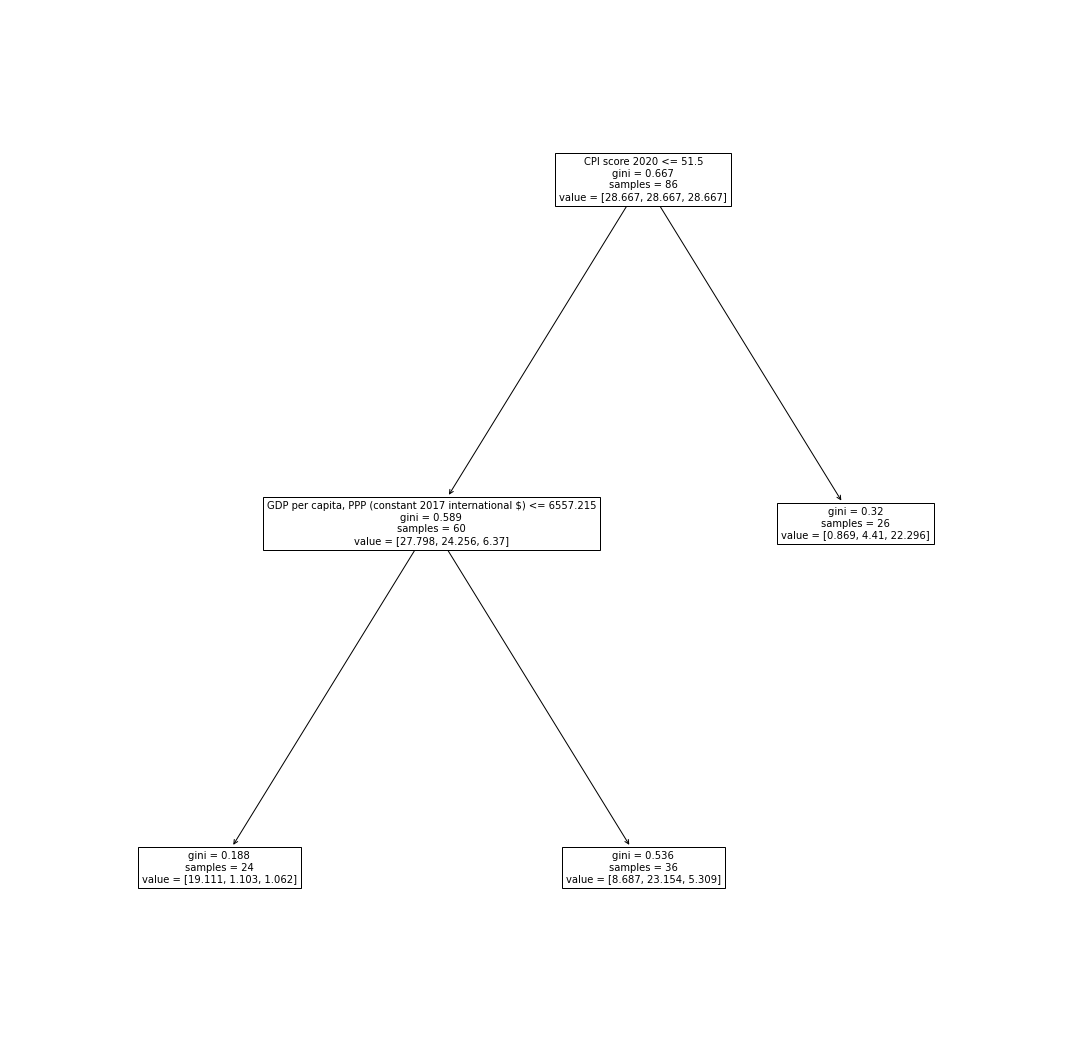

In [540]:
DEEP = 3
dtc = DecisionTreeClassifier(max_depth=DEEP, min_impurity_decrease=0.05,class_weight='balanced')


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Country', 'Doses_admin', \
                                                                     'People_partially_vaccinated',\
                                                                     'People_fully_vaccinated', 'target_num', \
                                                                    'target_cat', 'Human Capital Index (HCI) (scale 0-1)'], axis=1), \
                                                    df['target_cat'], test_size=0.33, random_state=7)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('F1:', metrics.f1_score(y_train, dtc.predict(X_train), average='macro'), \
      metrics.f1_score(y_test, y_pred, average='macro'))

print('ROC-AUC:', metrics.roc_auc_score(y_train, dtc.predict_proba(X_train), multi_class='ovo'), \
      metrics.roc_auc_score(y_test, dtc.predict_proba(X_test), multi_class='ovo'))
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


# plot tree
plt.figure(figsize=(19,19))  # set plot size (denoted in inches)
tree.plot_tree(dtc, fontsize=10, feature_names=X_train.columns)
plt.show()

R2: 1.0 0.6126189219345819


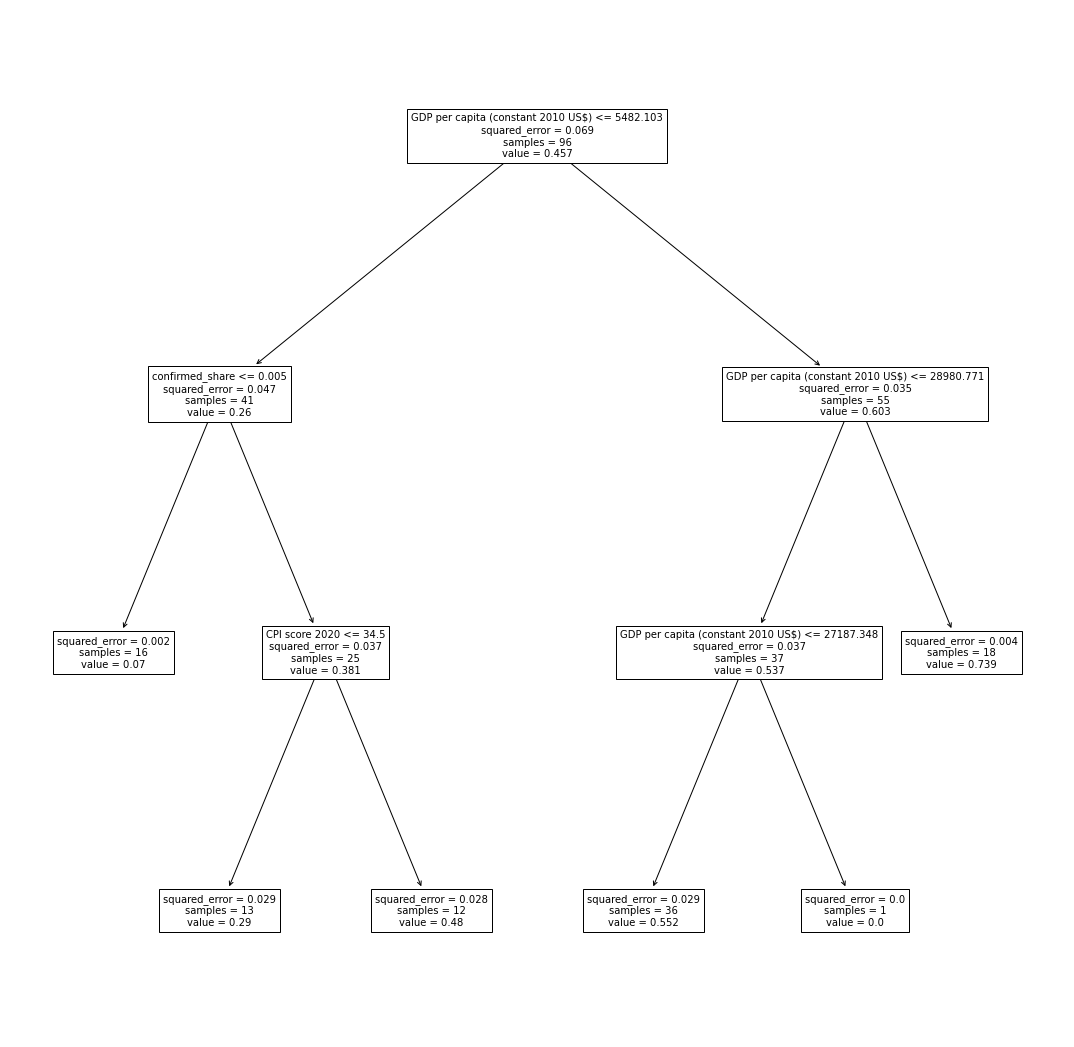

In [538]:
DEEP = 3


dtr = DecisionTreeRegressor(max_depth=DEEP, min_impurity_decrease=0.001)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Country', 'Doses_admin', \
                                                                     'People_partially_vaccinated',\
                                                                     'People_fully_vaccinated', 'target_num', \
                                                                    'target_cat', 'Human Capital Index (HCI) (scale 0-1)'], axis=1), \
                                                    df['target_num'], test_size=0.25, random_state=42)

dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('R2:', metrics.r2_score(y_train, y_train), metrics.r2_score(y_test, y_pred))

from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


# plot tree
plt.figure(figsize=(19,19))  # set plot size (denoted in inches)
tree.plot_tree(dtr, fontsize=10, feature_names=X_train.columns)
plt.show()

In [493]:
df.corr()

,"GDP per capita, PPP (constant 2017 international $)",GDP per capita (constant 2010 US$),Adjusted savings: education expenditure (% of GNI),"Population, total",GDP (constant 2010 US$),"GDP, PPP (current international $)",Military expenditure (% of GDP),Human Capital Index (HCI) (scale 0-1),Score 2020,CPI score 2020,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,death_share,confirmed_share,target_num,target_cat
"GDP per capita, PPP (constant 2017 international $)",1.000000,0.936219,0.230763,-0.115225,0.151348,0.046091,0.047546,0.758858,-0.368090,0.803939,-0.039695,-0.054946,-0.027661,-0.015287,-0.045252,0.142866,0.432610,0.652948,0.647608
GDP per capita (constant 2010 US$),0.936219,1.000000,0.282073,-0.101623,0.191515,0.053025,-0.045632,0.703552,-0.478220,0.824340,-0.036369,-0.048557,-0.025129,-0.008008,-0.043129,0.067438,0.328895,0.585308,0.603932
Adjusted savings: education expenditure (% of GNI),0.230763,0.282073,1.000000,-0.174033,-0.065908,-0.109549,0.125348,0.296431,-0.345868,0.398196,-0.132284,-0.132907,-0.130746,0.039586,0.071412,0.088365,0.155424,0.231496,0.229253
"Population, total",-0.115225,-0.101623,-0.174033,1.000000,0.711938,0.870060,0.012900,-0.042999,0.315099,-0.087981,0.926703,0.967243,0.864235,0.587911,0.438028,-0.119645,-0.175146,0.067114,0.052941
GDP (constant 2010 US$),0.151348,0.191515,-0.065908,0.711938,1.000000,0.942125,-0.027073,0.272361,0.139750,0.201618,0.843525,0.804682,0.863013,0.310088,0.287272,-0.028355,-0.061265,0.284443,0.293768
"GDP, PPP (current international $)",0.046091,0.053025,-0.109549,0.870060,0.942125,1.000000,0.008318,0.159083,0.262738,0.066803,0.963391,0.938744,0.964686,0.374502,0.323514,-0.054100,-0.101838,0.209653,0.207880
Military expenditure (% of GDP),0.047546,-0.045632,0.125348,0.012900,-0.027073,0.008318,1.000000,0.038384,0.287370,0.009870,0.006671,0.011633,-0.002909,0.042286,-0.005499,-0.050424,0.048805,0.053696,-0.014369
Human Capital Index (HCI) (scale 0-1),0.758858,0.703552,0.296431,-0.042999,0.272361,0.159083,0.038384,1.000000,-0.363139,0.767339,0.058412,0.038512,0.069601,0.076757,0.068374,0.333938,0.536339,0.742138,0.693848
Score 2020,-0.368090,-0.478220,-0.345868,0.315099,0.139750,0.262738,0.287370,-0.363139,1.000000,-0.599330,0.298624,0.298562,0.294444,0.086817,0.094101,-0.255682,-0.351317,-0.195082,-0.227854
CPI score 2020,0.803939,0.824340,0.398196,-0.087981,0.201618,0.066803,0.009870,0.767339,-0.599330,1.000000,-0.014032,-0.025008,-0.006113,0.008373,-0.050003,0.162364,0.441352,0.637975,0.633566
